In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod, GreenwellMethod, SejongOhMethod
from artemis.interactions_methods.model_specific import ConditionalMinimalDepthMethod, SplitScoreMethod
import matplotlib.pyplot as plt

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
model = RandomForestRegressor(n_estimators=80, max_depth=12).fit(X, y)

### Greenwell Method

In [5]:
vint = GreenwellMethod()
vint.fit(model, X, 5, show_progress=True) 

Calculating variable importance: 100%|██████████| 8/8 [00:00<00:00, 89.40it/s]


In [6]:
vint.ovo

,Feature 1,Feature 2,Greenwell Variable Interaction Measure
0,Latitude,Longitude,0.273042
1,MedInc,AveOccup,0.122424
2,MedInc,Latitude,0.115519
3,AveOccup,Latitude,0.101803
4,MedInc,Longitude,0.040862
5,HouseAge,Latitude,0.032441
6,AveOccup,Longitude,0.030539
7,HouseAge,Longitude,0.030145
8,MedInc,HouseAge,0.024713
9,AveRooms,Latitude,0.017498


In [7]:
vint.variable_importance

,Feature,Value
0,Latitude,0.522959
1,Longitude,0.468849
2,MedInc,0.319468
3,AveOccup,0.258333
4,HouseAge,0.049835
5,AveRooms,0.046775
6,AveBedrms,0.006570
7,Population,0.004609


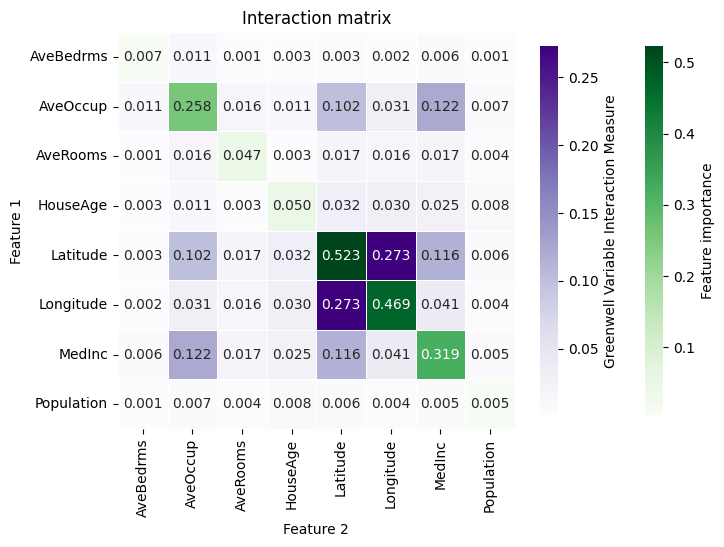

In [8]:
vint.plot(figsize=(8, 6)) 

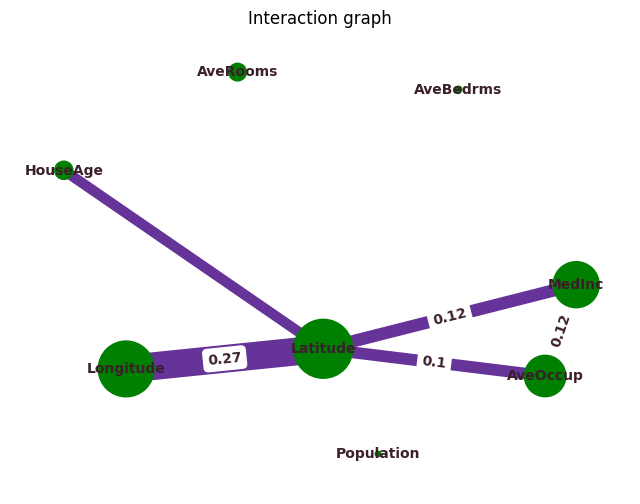

In [9]:
vint.plot("graph")  

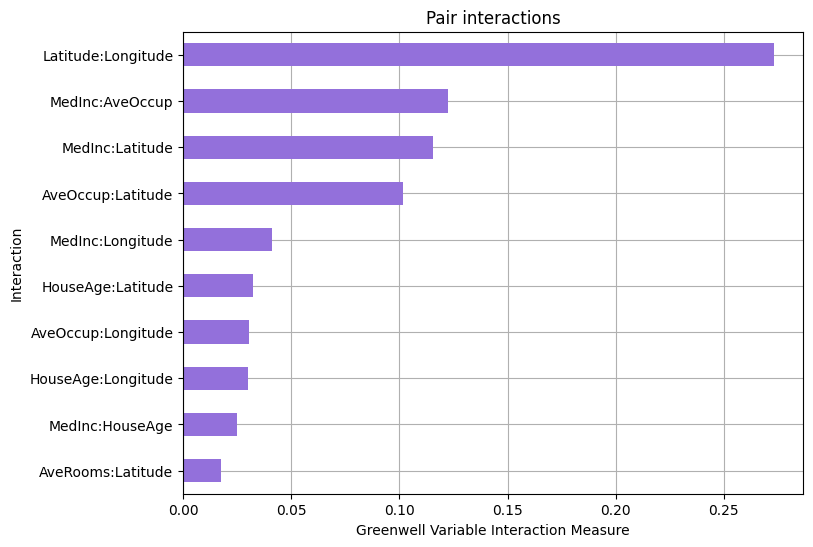

In [10]:
vint.plot("bar_chart")

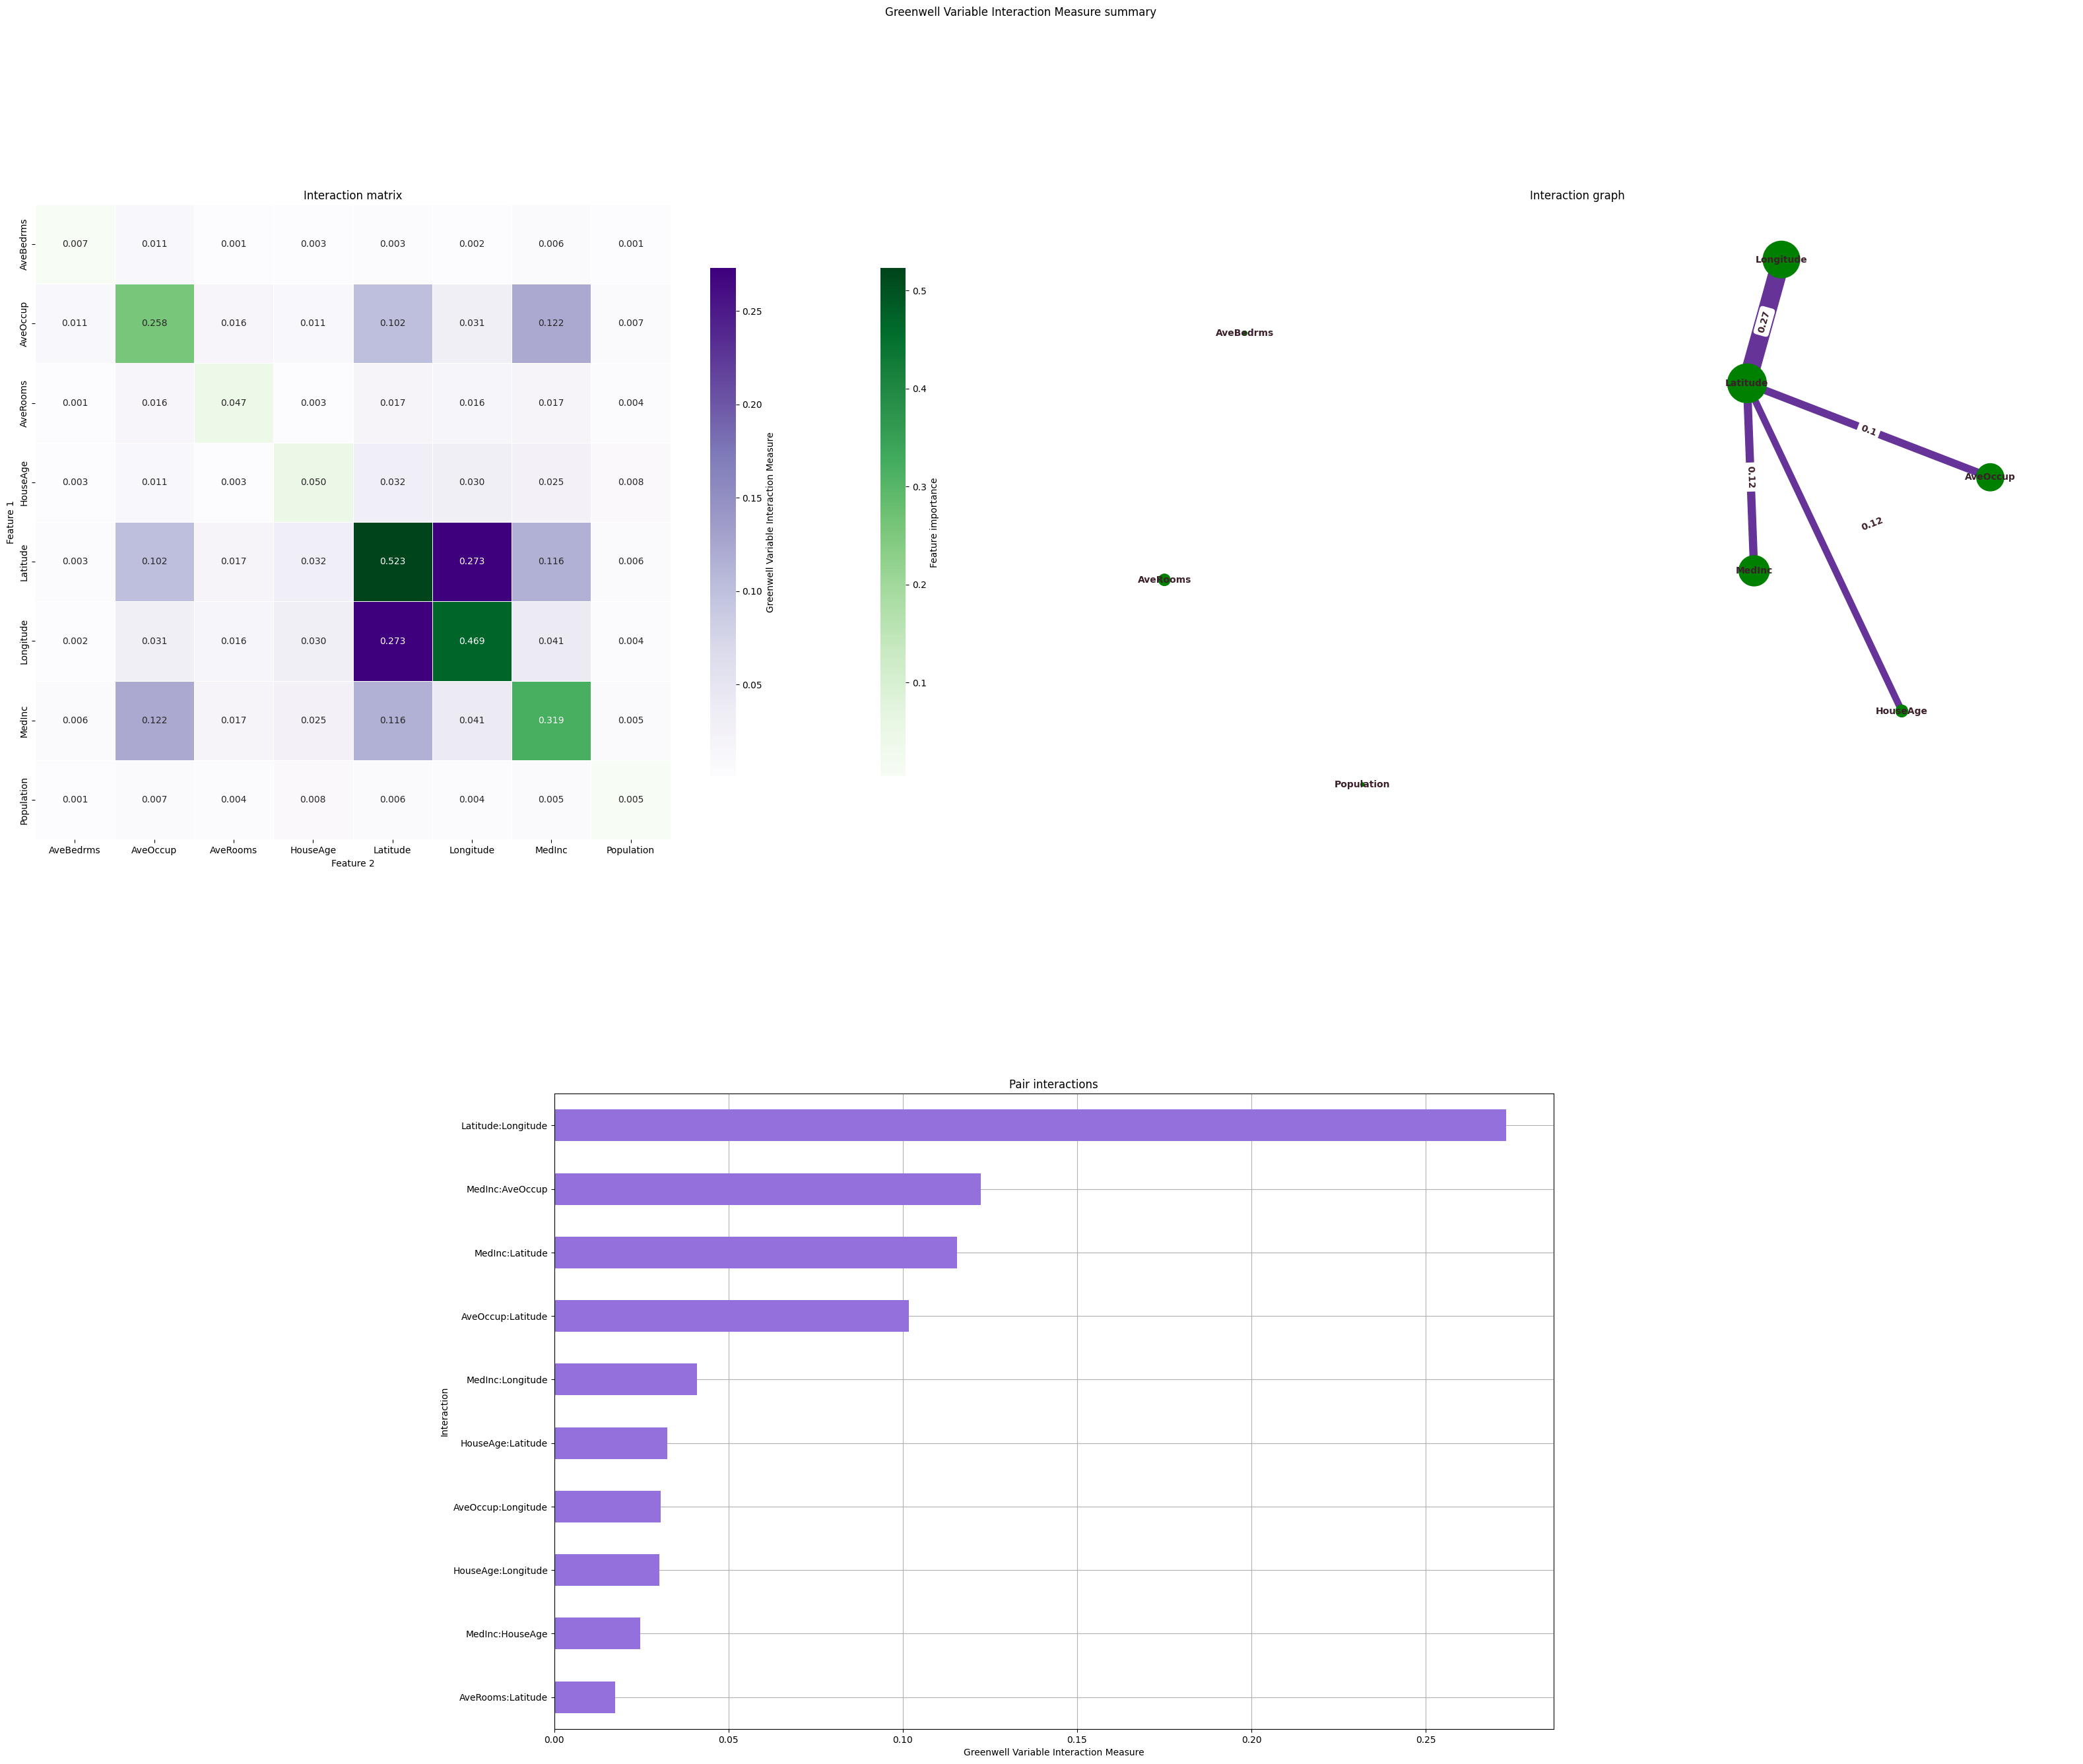

In [11]:
vint.plot("summary")

In [12]:
vint_subset = GreenwellMethod()
vint_subset.fit(model, X, 5, features=["Latitude", "Longitude", "HouseAge"],
                show_progress=True)  # subset of features 

Calculating variable importance: 100%|██████████| 3/3 [00:00<00:00, 80.10it/s]


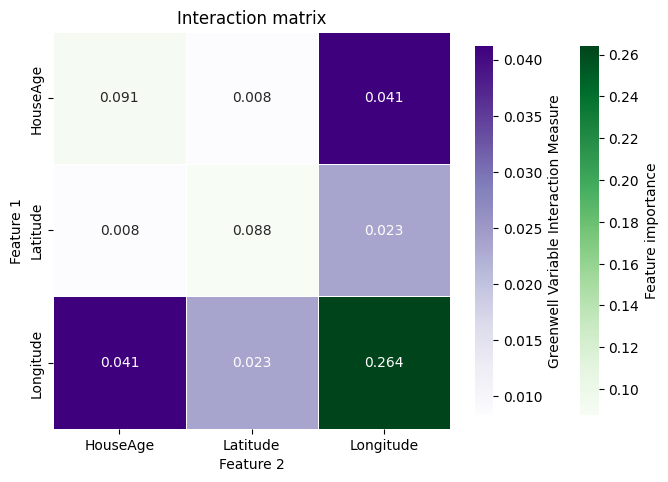

In [13]:
vint_subset.plot()

### H statistic

In [5]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(model, X, 5, show_progress=True)  # all features - FriedmanHStatistic

Calculating one vs all interactions: 100%|██████████| 8/8 [00:00<00:00, 40.43it/s]


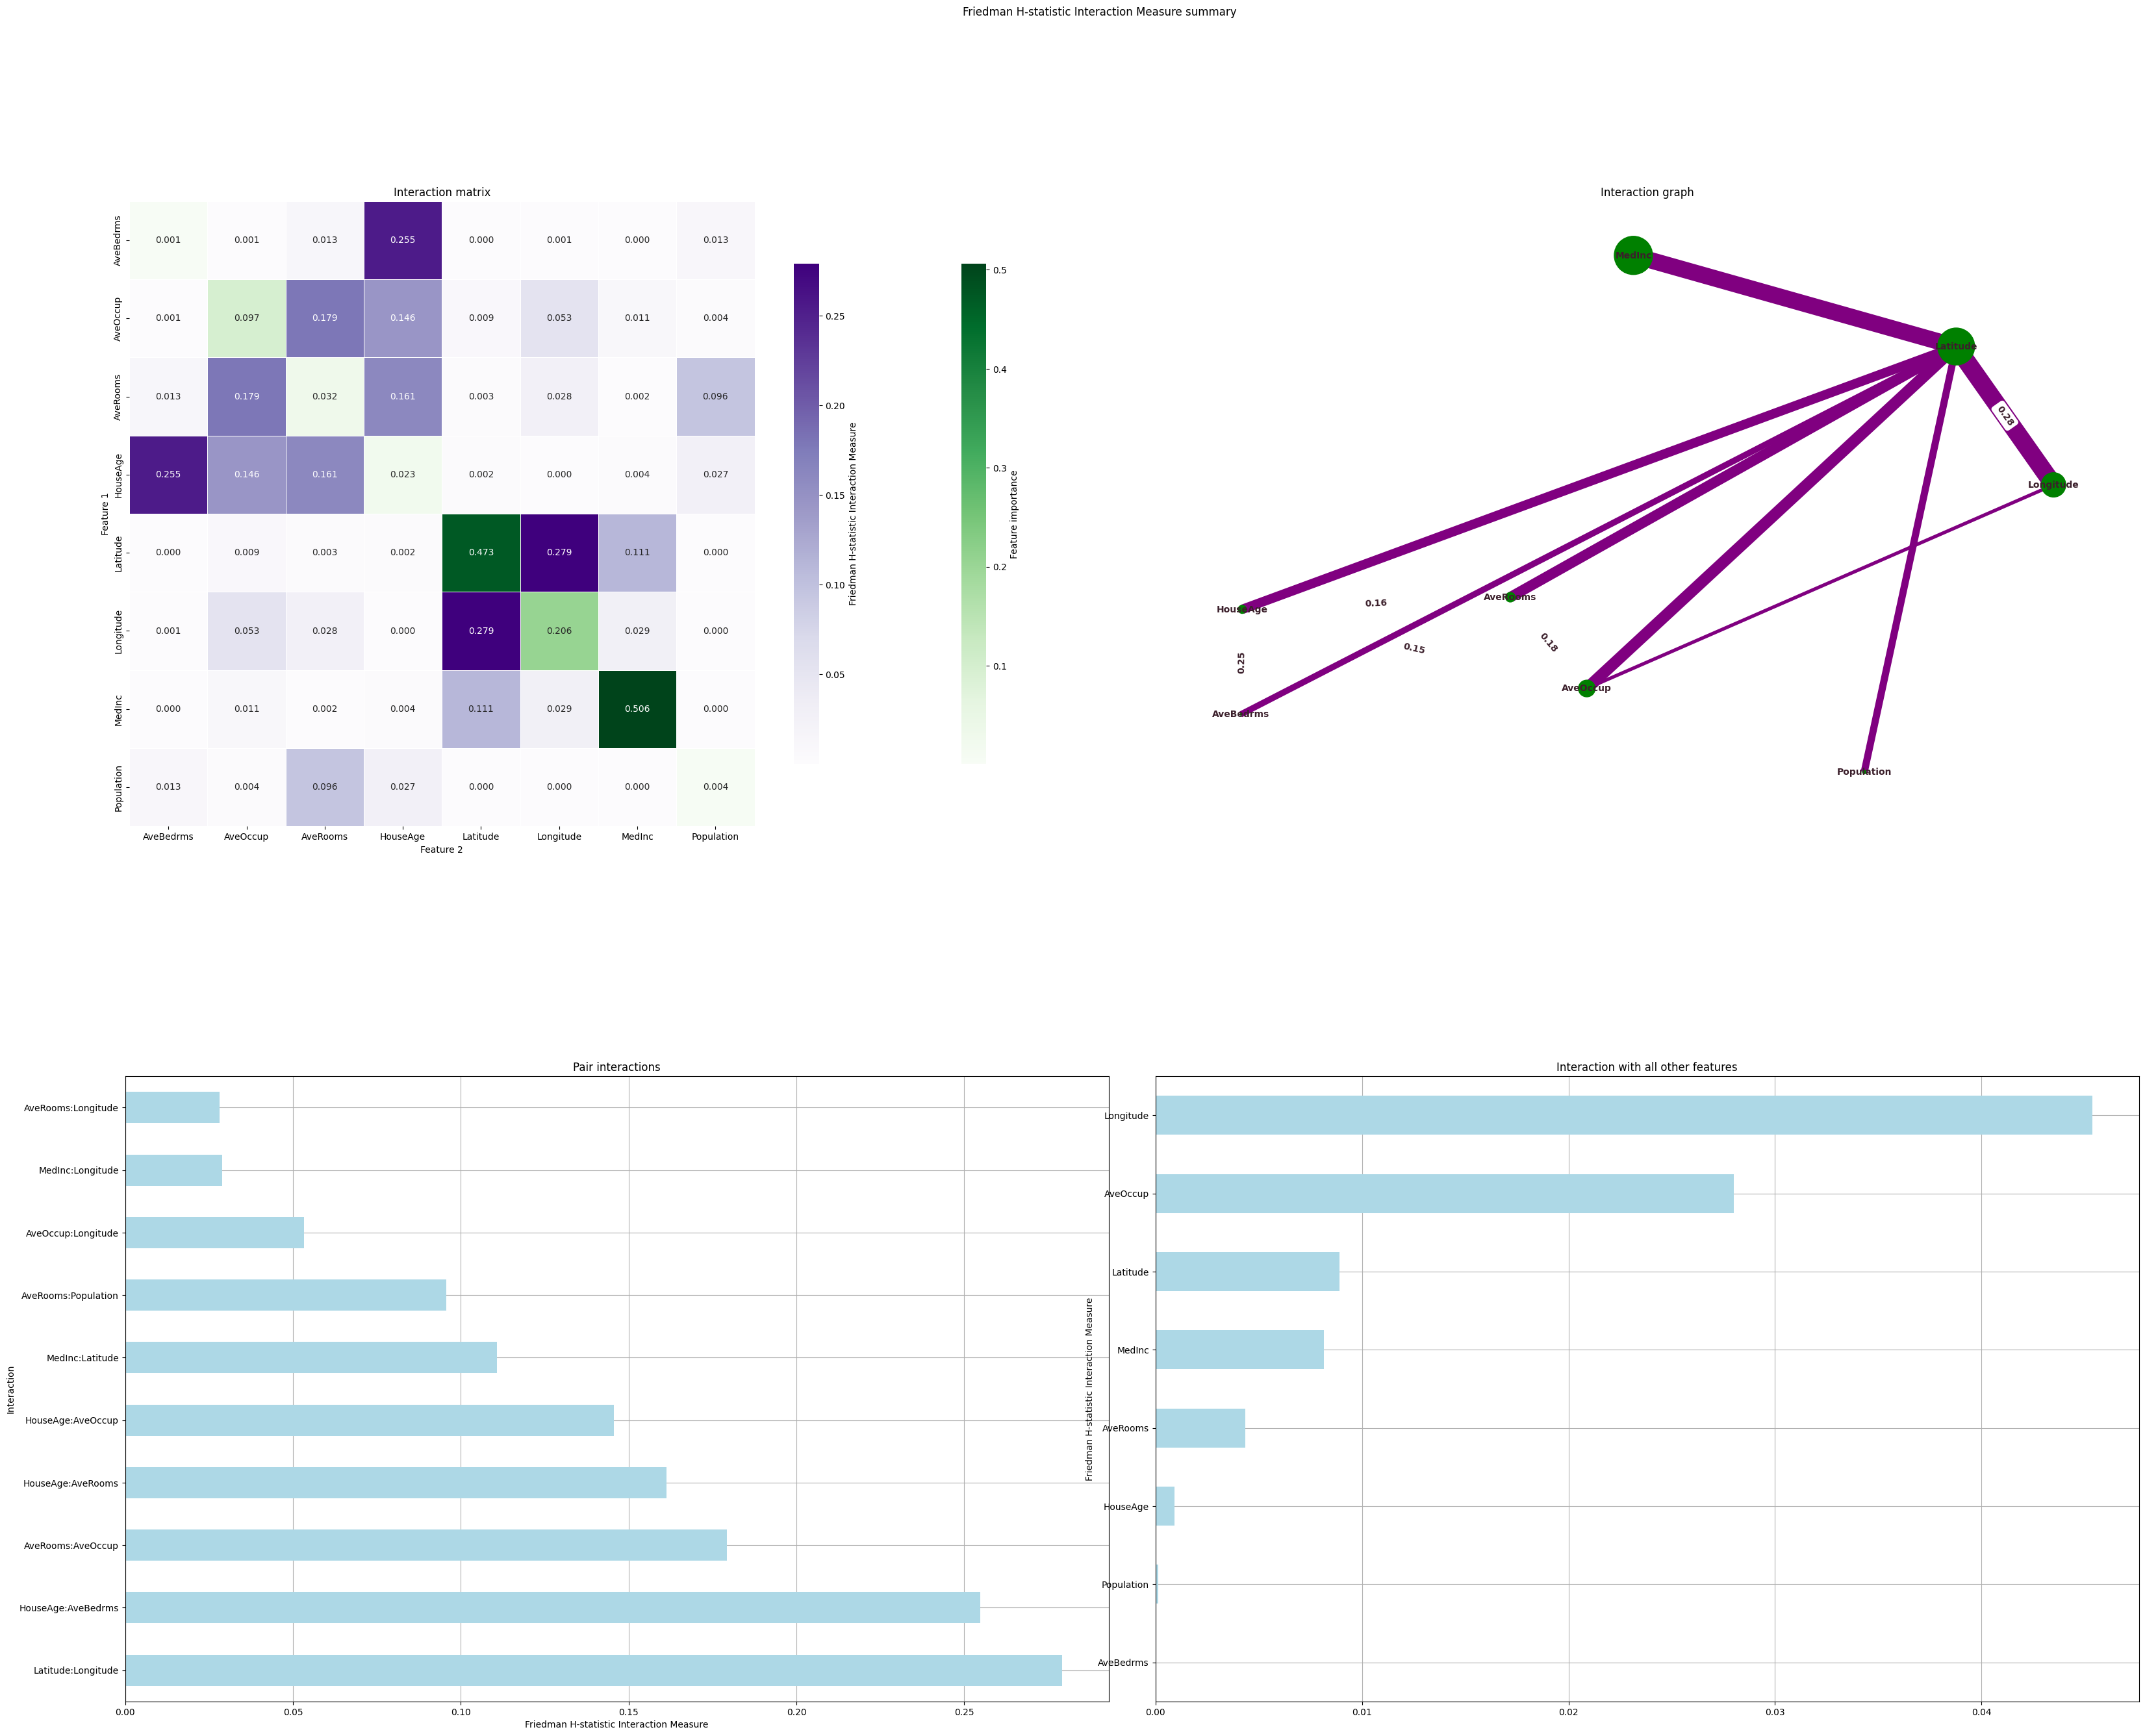

In [6]:
h_stat.plot("summary")

In [17]:
h_stat_subset = FriedmanHStatisticMethod()
h_stat_subset.fit(model, X, 10, features=["Latitude", "Longitude", "HouseAge"],
                  show_progress=True)  # subset of features - FriedmanHStatistic

Calculating one vs all interactions: 100%|██████████| 3/3 [00:00<00:00, 20.41it/s]


(5, 10)

### Sejong Oh Method

In [18]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, 100, show_progress=True)  # all features - SejongOhInteraction

Calculating variable importance: 100%|██████████| 10/10 [00:00<00:00, 32.36it/s]


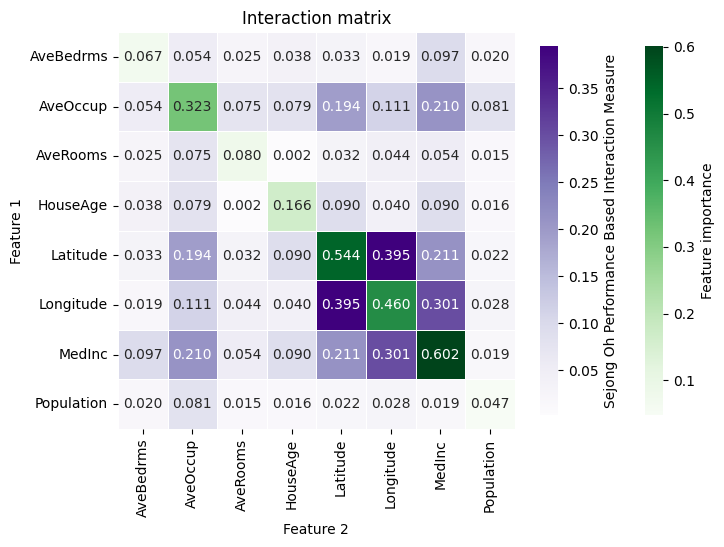

In [19]:
perf_based.plot() 

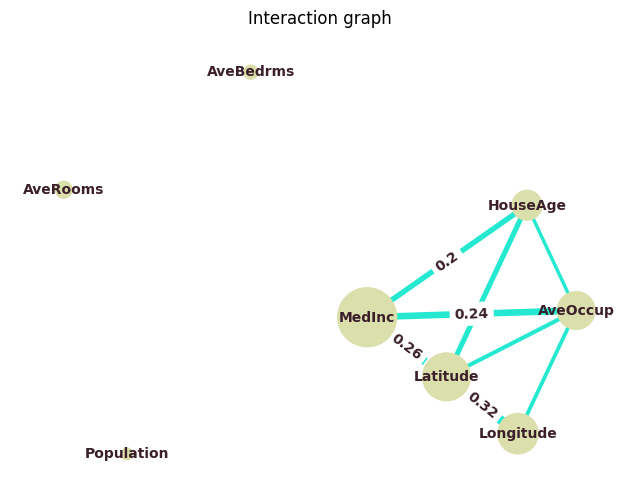

In [20]:
perf_based.plot("graph")  # interaction graph - SejongOhInteraction

In [21]:
perf_based_subset = SejongOhMethod()
perf_based_subset.fit(model, X, y, 500, features=["Latitude", "Longitude", "HouseAge"],
               show_progress=True)  # subset of features - SejongOhInteraction

Calculating variable importance: 100%|██████████| 10/10 [00:00<00:00, 41.61it/s]


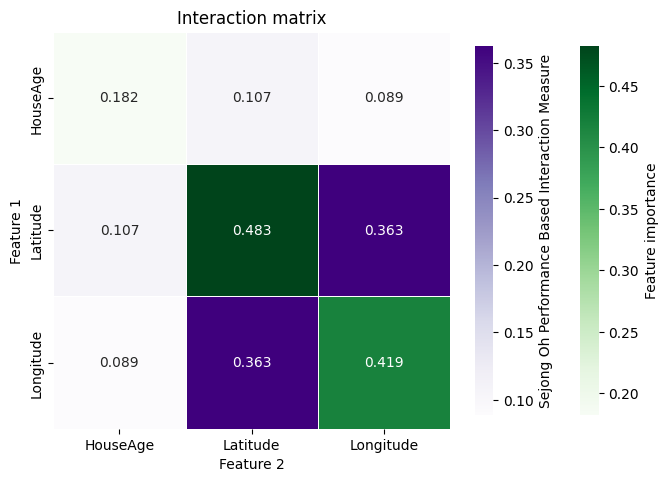

In [22]:
perf_based_subset.plot()

### Comparator

In [5]:
from artemis.comparision import FeatureInteractionMethodComparator

In [6]:
comparator = FeatureInteractionMethodComparator()
comparator.summary(h_stat, perf_based)

NameError: name 'h_stat' is not defined

### Conditional Depth Method

In [8]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X, y)
cond = ConditionalMinimalDepthMethod()
cond.fit(model_rf, X,show_progress=True)  

100%|██████████| 100/100 [00:04<00:00, 23.54it/s]


In [9]:
cond.ovo

,root_variable,variable,Conditional Minimal Depth Measure,n_occurences
1,AveOccup,MedInc,0.00,100
2,AveOccup,HouseAge,0.04,100
3,Latitude,Longitude,0.10,100
4,HouseAge,AveOccup,0.14,100
5,HouseAge,MedInc,0.15,100
6,HouseAge,Latitude,0.26,100
7,HouseAge,Population,0.53,100
8,HouseAge,Longitude,0.62,100
9,Longitude,AveOccup,0.69,100
11,AveOccup,Latitude,0.73,100


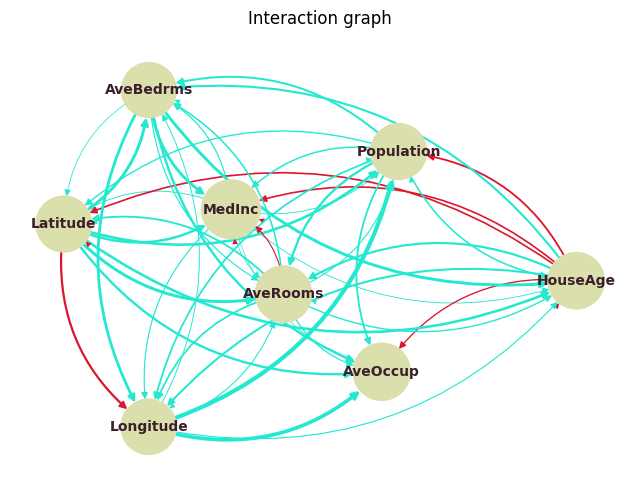

In [10]:
cond.plot("graph")

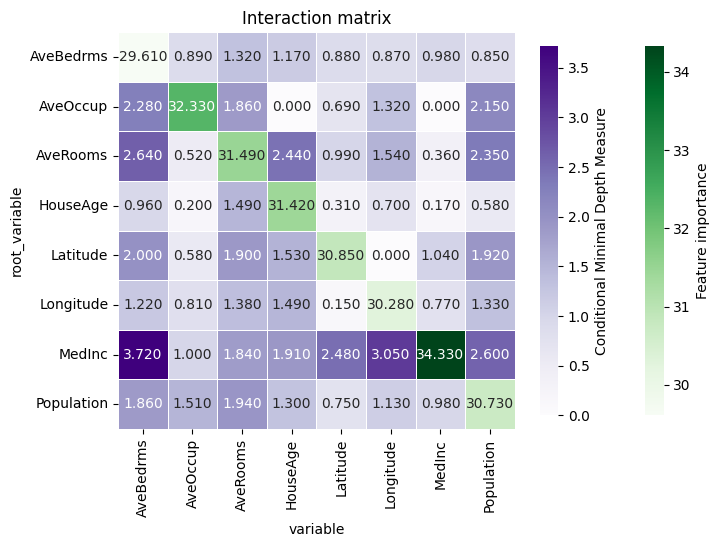

In [14]:
cond.plot()

### Split Score Method

In [15]:
from xgboost import XGBRegressor
model_gb = XGBRegressor(n_estimators=80, max_depth=4).fit(X, y)

In [16]:
split_score = SplitScoreMethod()
split_score.fit(model_gb, X, show_progress=True, interaction_selected_metric = "sum_gain",)

100%|██████████| 80/80 [00:01<00:00, 77.24it/s]


In [17]:
full_results = split_score.full_result

In [133]:
full_results

,tree,ID,depth,split_feature,parent_name,gain,cover,parent_gain,parent_cover,leaf,interaction
0,0,0-0,0,MedInc,NaN,8512.257810,20640.0,NaN,NaN,False,NaN
1,0,0-1,1,MedInc,MedInc,2172.193360,16255.0,8512.25781,20640.0,False,False
2,0,0-2,1,MedInc,MedInc,1586.050780,4385.0,8512.25781,20640.0,False,False
3,0,0-3,2,AveRooms,MedInc,397.370117,7860.0,2172.19336,16255.0,False,False
4,0,0-4,2,AveOccup,MedInc,1249.347660,8395.0,2172.19336,16255.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2383,79,79-26,None,Leaf,NaN,-0.058115,34.0,NaN,NaN,True,NaN
2384,79,79-27,None,Leaf,NaN,0.025529,257.0,NaN,NaN,True,NaN
2385,79,79-28,None,Leaf,NaN,-0.025218,1404.0,NaN,NaN,True,NaN
2386,79,79-29,None,Leaf,NaN,-0.006300,3165.0,NaN,NaN,True,NaN


In [187]:
def plot_lollipop(full_results, figsize=(8, 6), scale="linear", max_trees=0.5, label_threshold=0.1, max_depth=1) :
    full_results_copy = full_results.copy()
    full_results_copy["pair_name"] = full_results_copy["parent_name"] + ":" + full_results_copy["split_feature"]
    roots = full_results_copy.loc[full_results['depth'] == 0].copy()
    roots = roots[roots["tree"] < max_trees * roots["tree"].max()]
    nodes = full_results_copy.loc[(full_results['leaf'] == False) & (full_results['depth'] > 0) & (full_results['depth'] <= max_depth)].copy()
    nodes.loc[full_results_copy['interaction'] == True, "split_feature"] =  nodes.loc[full_results_copy['interaction'] == True, "pair_name"] 
    nodes = nodes[nodes["tree"] < max_trees * nodes["tree"].max()]
    markers= ["o" , "," , "v" , "^" , "<", ">"]
    colors = [matplotlib.colors.rgb2hex(matplotlib.cm.Set1(i)) for i in range(4)]
    fig = plt.figure(figsize=figsize)
    plt.xscale(scale) 
    plt.xticks(roots["tree"]+1, roots["tree"])
    plt.plot(roots["tree"]+1, roots["gain"], c = colors[0])   
    plt.scatter(roots["tree"]+1, roots["gain"], color = colors[0], marker=markers[0])
    for i in range(1, max_depth+1) :
        print(i)
        nodes_to_plot = nodes.loc[nodes["depth"] == i]
        plt.scatter(nodes_to_plot["tree"]+1, nodes_to_plot["gain"], label=nodes_to_plot["depth"], 
                    color=colors[i], marker=markers[i])
        nodes_to_annotate = nodes_to_plot.loc[nodes_to_plot["interaction"] == True]
        for j, node in nodes_to_annotate.iterrows(): 
            plt.annotate(node["pair_name"], (node["tree"]+1, node["gain"]), 
            (node["tree"],  node["gain"]), 
            rotation=90, 
            size=7),
   
    plt.grid() 
    plt.ylim(bottom=0)

    roots_labels = roots.loc[roots["gain"] >= label_threshold * roots["gain"].max()]
    for i, root in roots_labels.iterrows():
        plt.annotate(root["split_feature"], (root["tree"]+1,  root["gain"]), (root["tree"]+1,  root["gain"]))
    plt.show()

1


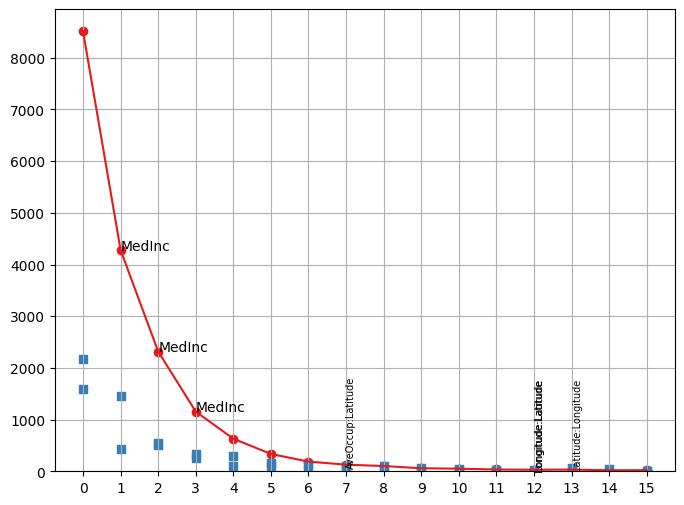

In [188]:
plot_lollipop(full_results, max_depth=1, max_trees=0.2)

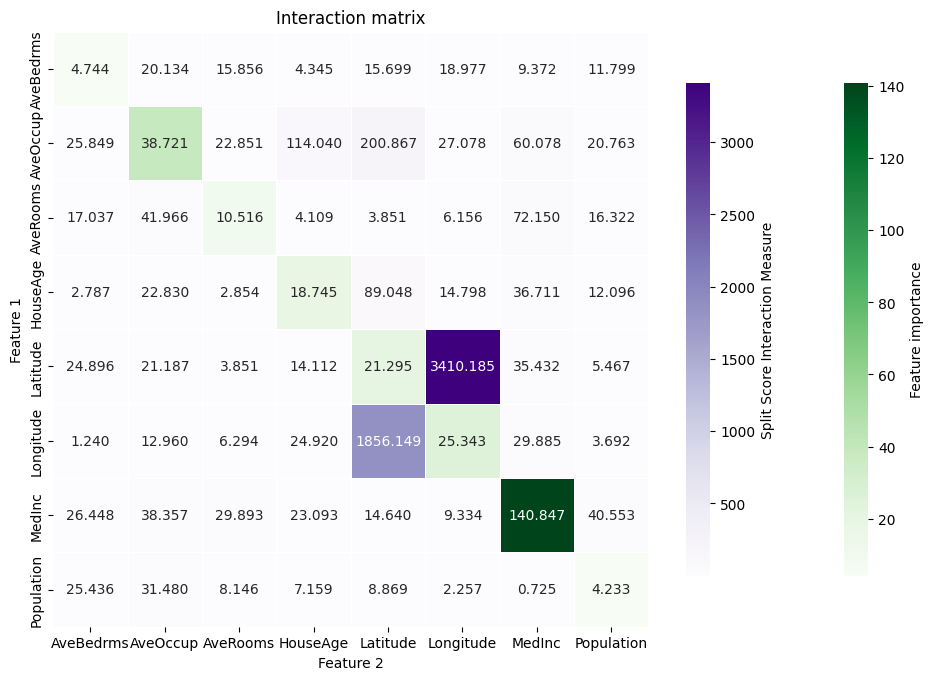

In [150]:
split_score.plot(figsize=(12, 8))

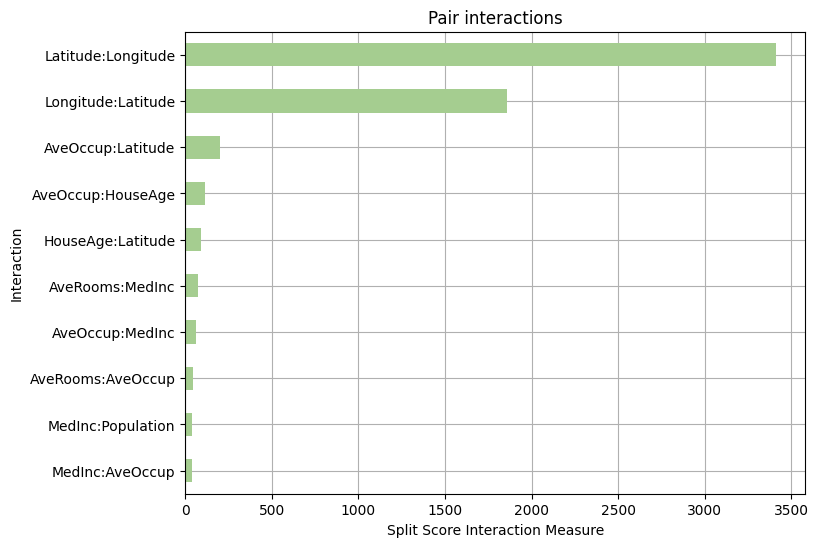

In [27]:
split_score.plot("bar_chart")

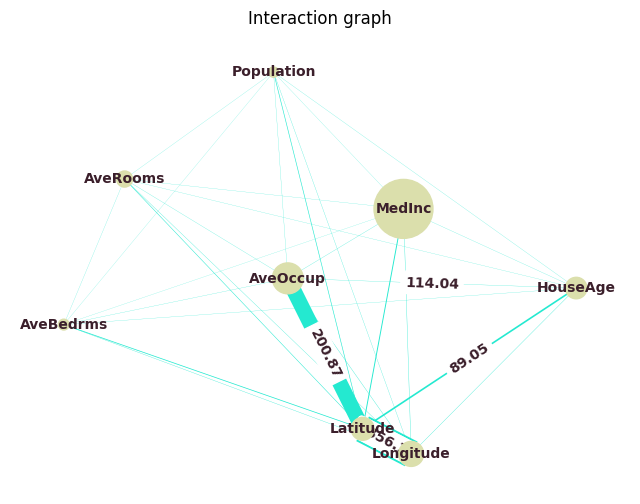

In [7]:
split_score.plot("graph")